This kernel is very basic model. I hope it will help you.

**Please upvote to encourage me to do more.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [ ]:
train = pd.read_csv('../input/train.csv')
train.head()

In [ ]:
train['author'].unique()

**hp lovecraft**
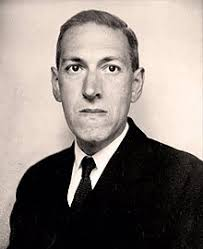

**edgar allan poe**
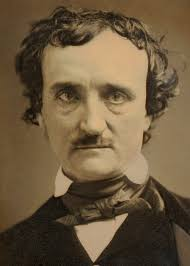

**Mary Wollstonecraft Shelley**
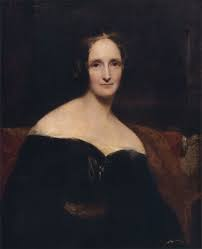

In [ ]:
import seaborn as sns

In [ ]:
sns.countplot('author',data = train)


In [ ]:
train['length'] = train.text.str.count(' ')

In [ ]:
train.head()

In [ ]:
train[train["author"]=="MWS"]["length"].describe()

In [ ]:
train[train["author"]=="HPL"]["length"].describe()

In [ ]:
train[train["author"]=="EAP"]["length"].describe()


In [ ]:
train[train['length'] == 860]

In [ ]:
train.text.values[9215]

In [ ]:
sns.boxplot(x = 'author',y = 'length',data = train)

In [ ]:
import nltk

In [ ]:
print(nltk.word_tokenize(train.text[0]))


In [ ]:
from sklearn.feature_extraction.text    import CountVectorizer,TfidfVectorizer

In [ ]:
text = list(train.text.values)
text

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(text)

In [ ]:
print(tf_vectorizer.get_feature_names()[0:100])

In [ ]:
train.head()

In [ ]:
from sklearn.model_selection import train_test_split

train1 ,test1 = train_test_split(train,test_size=0.2) 
np.random.seed(0)
train1.head()

In [ ]:
X_train = train1['text'].values
X_test = test1['text'].values
y_train = train1['author'].values
y_test = test1['author'].values

In [ ]:
X_train[1],y_train[0]

In [ ]:
X_test[0],y_test[0]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

**Here i used Countvectorizer only, you can try TfidfVectorizer also.**

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
                    ])
text_clf = text_clf.fit(X_train,y_train)
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

In [ ]:
text_clf = Pipeline([('vect', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
                    ])
text_clf = text_clf.fit(X_train,y_train)
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.naive_bayes import MultinomialNB


In [ ]:
rfc = RandomForestClassifier()
etrc = ExtraTreesClassifier()
xgbc = xgb.XGBClassifier()
lgbmc = lgbm.LGBMClassifier()
mnb = MultinomialNB()

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', rfc)
                    ])
text_clf = text_clf.fit(X_train,y_train)
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', xgbc)
                    ])
text_clf = text_clf.fit(X_train,y_train)
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', lgbmc)
                    ])
text_clf = text_clf.fit(X_train,y_train)
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', mnb)
                    ])
text_clf = text_clf.fit(X_train,y_train)
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

**Here i'm trying to apply LSA and extraxt the top words of author EAP**

In [ ]:
train.head()

In [ ]:
text = list(train[train['author']=='EAP'].text.values)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True,stop_words='english')

In [ ]:
X =vectorizer.fit_transform(text)


In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=3,n_iter=500)

In [ ]:
lsa.fit(X)

In [ ]:
terms = vectorizer.get_feature_names()


In [ ]:
for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

Further :
* tune the parameters of the model to get high accuracy
* clean the data further if needed like removing common words and stop words
* ensemble models
* data visulazation
* if needed feature engineering 
and many things to do ....



**More to come...**

**Please upvote to encourage me.**

**Thank you :)** 